In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

### Dataset

In [176]:
#! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

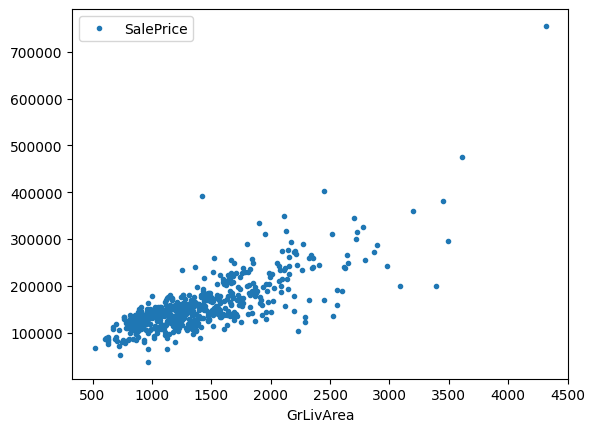

In [177]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [178]:
def model(x,m,b):
   return m * x + b

In [179]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [180]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*(data['GrLivArea'].shape)//batch_size
```

Please plot your learning curve for different batch size, such as 64, 256, 1024, 4096. 

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*16
(64, 1e-7, 1e-1)*32
...
```

**How to submit your homework**
* Fork the github repo to your personal github 
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github. 

Follow the below instruction on how to do this: 
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

In [325]:
def fit_batched_data_min_des(data,iterations = 30,batch_size = 32,learning_rate_m = 1e-7,
                     learning_rate_b = 1e-1,mini = True):
    loss_history = []
    
    # we run our loop N times
    #data_batch = data.sample(batch_size)
    #data_x = data_batch['GrLivArea'].to_numpy()
    #data_y = data_batch['SalePrice'].to_numpy()
    data_randomized = data.sample(frac=1).reset_index(drop=True)

    # Split the randomized DataFrame into N batches
    batches = np.array_split(data_randomized, batch_size)
    min_y = min(batches[0]['SalePrice'])
    max_y = max(batches[0]['SalePrice'])

    min_x = min(batches[0]['GrLivArea'])
    max_x = max(batches[0]['GrLivArea'])

    # use these to plot our progress over time
    b = np.random.uniform(min_y,max_y, 1)[0]
    m = (max_y-min_y)/(max_x-min_x)*np.random.uniform(0,10, 1)[0]


    loop_N = iterations
    if mini:
        for i in range(loop_N):
            for batch in batches:
                batch_x = batch['GrLivArea'].to_numpy()
                batch_y = batch['SalePrice'].to_numpy()
                
                # Update our slope and intercept based on the current batch
                m = updated_m(batch_x, batch_y, m, b, learning_rate_m)
                b = updated_b(batch_x, batch_y, m, b, learning_rate_b)
            
               # Calculate the loss value for the entire dataset after updating with all batches
            loss_value = np.mean(loss(data['GrLivArea'].to_numpy(), data['SalePrice'].to_numpy(), m, b))
        
        # Keep a history of our loss values
            loss_history.append(loss_value)
    else:
        for batch in batches:
            for i in range(loop_N):           
                # Convert batch to numpy arrays
                batch_x = batch['GrLivArea'].to_numpy()
                batch_y = batch['SalePrice'].to_numpy()
                
                # Update our slope and intercept based on the current batch
                m = updated_m(batch_x, batch_y, m, b, learning_rate_m)
                b = updated_b(batch_x, batch_y, m, b, learning_rate_b)
            
               # Calculate the loss value for the entire dataset after updating with all batches
            loss_value = np.mean(loss(data['GrLivArea'].to_numpy(), data['SalePrice'].to_numpy(), m, b))
        
        # Keep a history of our loss values
            loss_history.append(loss_value)

    return (m,b,loss_history)


In [332]:
def fit_batched_data(data,iterations = 30,batch_size = 32,learning_rate_m = 1e-7,
                     learning_rate_b = 1e-1,mini = True):
    m = 5.
    b = 1000.
    # use these to plot our progress over time
    loss_history = []
    
    # we run our loop N times
    #data_batch = data.sample(batch_size)
    #data_x = data_batch['GrLivArea'].to_numpy()
    #data_y = data_batch['SalePrice'].to_numpy()
    data_randomized = data.sample(frac=1).reset_index(drop=True)

    # Split the randomized DataFrame into N batches
    batches = np.array_split(data_randomized, batch_size)
    loop_N = 30
    for batch in batches:
        
        min_y = min(batch['SalePrice'])
        max_y = max(batch['SalePrice'])

        min_x = min(batch['GrLivArea'])
        max_x = max(batch['GrLivArea'])

        # use these to plot our progress over time
        b = np.random.uniform(min_y,max_y, 1)[0]
        m = np.random.uniform(0,10,1)[0]
        
        for i in range(loop_N):   
            # Convert batch to numpy arrays
            batch_x = batch['GrLivArea'].to_numpy()
            batch_y = batch['SalePrice'].to_numpy()
            
            # Update our slope and intercept based on the current batch
            m = updated_m(batch_x, batch_y, m, b, learning_rate_m)
            b = updated_b(batch_x, batch_y, m, b, learning_rate_b)
            
               # Calculate the loss value for the entire dataset after updating with all batches
        loss_value = np.mean(loss(data['GrLivArea'].to_numpy(), data['SalePrice'].to_numpy(), m, b))
        
        # Keep a history of our loss values
        loss_history.append(loss_value) 

    return (m,b,loss_history)


# Exercise 1. Split the data in batches

In [338]:
batch_size_list = [32,64,128,256,512]

In [339]:
m_values = np.zeros(len(batch_size_list))
b_values =  np.zeros(len(batch_size_list))
loss_values = []
for i in range(len(batch_size_list)):
    res = fit_batched_data_min_des(data,iterations = 30,batch_size = batch_size_list[i],learning_rate_m = 1e-7,learning_rate_b = 1e-1)
    m_values[i],b_values[i] = res[0],res[1]
    loss_values.append(res[2])

In [340]:
m_values_2 = np.zeros(len(batch_size_list))
b_values_2 =  np.zeros(len(batch_size_list))
loss_values_2 = []
for i in range(len(batch_size_list)):
    res = fit_batched_data_min_des(data,iterations = 30,batch_size = batch_size_list[i],
                                   learning_rate_m = 1e-7,learning_rate_b = 1e-1,mini=False)
    m_values_2[i],b_values_2[i] = res[0],res[1]
    loss_values_2.append(res[2])

In [341]:
m_values_3 = np.zeros(len(batch_size_list))
b_values_3 =  np.zeros(len(batch_size_list))
loss_values_3 = []
for i in range(len(batch_size_list)):
    res = fit_batched_data(data,iterations = 30,batch_size = batch_size_list[i],
                                   learning_rate_m = 1e-7,learning_rate_b = 1e-1,mini=False)
    m_values_3[i],b_values_3[i] = res[0],res[1]
    loss_values_3.append(res[2])

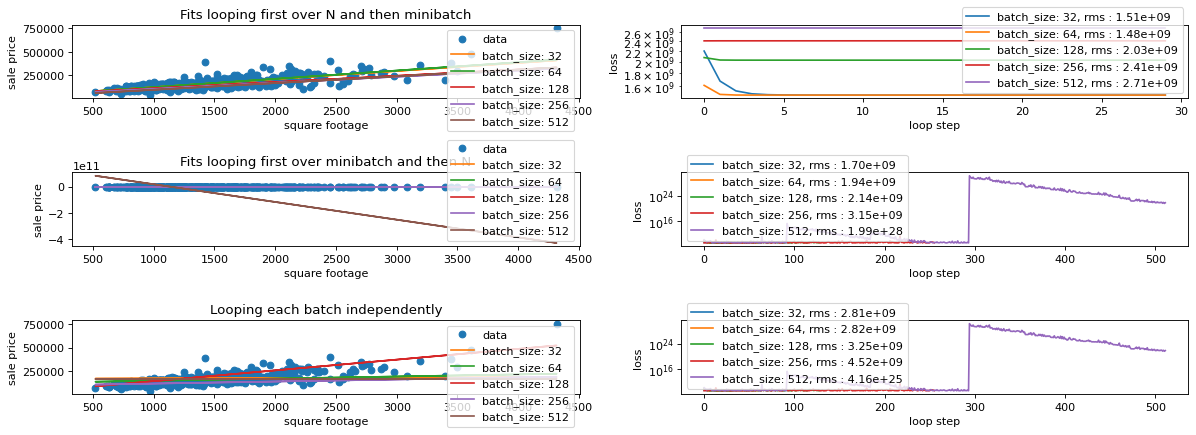

In [343]:
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()

fig,ax = plt.subplots(3,2,figsize=(18,6),dpi=80)
fig.subplots_adjust(hspace=1.0)  # Adjust the space between plots

# lot our usual output
#plot_data(data_x,data_y,m,b,ax[0])

# here we also plot the calculated linear fit for comparison
line_x = np.arange(data_x.min(),data_x.max())
line_y = line_x * m_calc + b_calc
ax[0,0].plot(data_x,data_y,'o',label='data')
for j in range(len(m_values)):
    line_y = data_x * m_values[j] + b_values[j]
    ax[0,0].plot(data_x,line_y,label = 'batch_size: '+str(batch_size_list[j]))
ax[0,0].legend()
ax[0,0].set_xlabel('square footage')
ax[0,0].set_ylabel('sale price')
ax[0,0].set_title('Fits looping first over N and then minibatch')


# plot the loss 
for j in range(len(m_values)):
    val  = str(format(np.sum(loss_values[j])/len(loss_values[j]),'.2e'))
    ax[0,1].plot(loss_values[j],label = 'batch_size: '+str(batch_size_list[j])+', rms : '+val)
ax[0,1].set_yscale('log')
ax[0,1].legend()
ax[0,1].set_xlabel('loop step')
ax[0,1].set_ylabel('loss')

# here we also plot the calculated linear fit for comparison
line_x = np.arange(data_x.min(),data_x.max())
ax[1,0].plot(data_x,data_y,'o',label='data')
for j in range(len(m_values_2)):
    line_y = data_x * m_values_2[j] + b_values_2[j]
    ax[1,0].plot(data_x,line_y,label = 'batch_size: '+str(batch_size_list[j]))
ax[1,0].legend()
ax[1,0].set_xlabel('square footage')
ax[1,0].set_ylabel('sale price')
ax[1,0].set_title('Fits looping first over minibatch and then N')

    
# plot the loss 
for j in range(len(m_values_2)):
    val  = str(format(np.sum(loss_values_2[j])/len(loss_values_2[j]),'.2e'))

    ax[1,1].plot(loss_values_2[j],label = 'batch_size: '+str(batch_size_list[j])+', rms : '+val)
ax[1,1].set_yscale('log')
ax[1,1].legend()
ax[1,1].set_xlabel('loop step')
ax[1,1].set_ylabel('loss')

ax[2,0].plot(data_x,data_y,'o',label='data')
for j in range(len(m_values_3)):
    line_y = data_x * m_values_3[j] + b_values_3[j]
    ax[2,0].plot(data_x,line_y,label = 'batch_size: '+str(batch_size_list[j]))
ax[2,0].legend()
ax[2,0].set_xlabel('square footage')
ax[2,0].set_ylabel('sale price')
ax[2,0].set_title('Looping each batch independently')

    
# plot the loss 
for j in range(len(m_values_3)):
    val  = str(format(np.sum(loss_values_3[j])/len(loss_values_3[j]),'.2e'))

    ax[2,1].plot(loss_values_2[j],label = 'batch_size: '+str(batch_size_list[j])+', rms : '+val)
ax[2,1].set_yscale('log')
ax[2,1].legend()
ax[2,1].set_xlabel('loop step')
ax[2,1].set_ylabel('loss')
plt.show()

# Exercise 2. Change the learning rate for a given batch

In [346]:
batch_choice_index = 1
learning_rate_m = 1e-7 * np.array([0.1,0.5,1,2,4,8])
learning_rate_b = 1e-1 * np.array([0.1,0.5,1,2,4,8])


m_values = np.zeros(len(learning_rate_m))
b_values =  np.zeros(len(learning_rate_m))
loss_values = []
for i in range(len(learning_rate_m)):
    res = fit_batched_data_min_des(data,iterations = 30,batch_size = 64,
                           learning_rate_m = learning_rate_m[i],
                           learning_rate_b = learning_rate_b[i])
    m_values[i],b_values[i] = res[0],res[1]
    loss_values.append(res[2])

/local/user/francisco.jimenez/ipykernel_12857/3061333823.py:3: RuntimeWarning: overflow encountered in power
  return np.power( y - y_predicted, 2 )
/local/user/francisco.jimenez/ipykernel_12857/4129302290.py:2: RuntimeWarning: invalid value encountered in add
  return m * x + b


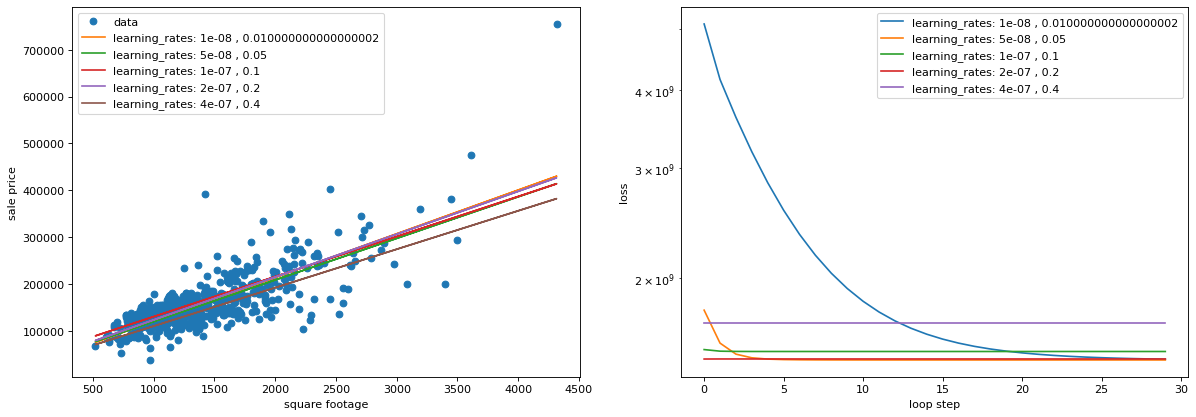

In [347]:
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()

fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
# lot our usual output
#plot_data(data_x,data_y,m,b,ax[0])

# here we also plot the calculated linear fit for comparison
line_x = np.arange(data_x.min(),data_x.max())
line_y = line_x * m_calc + b_calc
ax[0].plot(data_x,data_y,'o',label='data')
for j in range(len(m_values)):
    if not np.isinf(loss_values[j]).any():

        line_y = data_x * m_values[j] + b_values[j]
        ax[0].plot(data_x,line_y,label = 'learning_rates: '+str(learning_rate_m[j])+' , '+str(learning_rate_b[j]))
ax[0].legend()
ax[0].set_xlabel('square footage')
ax[0].set_ylabel('sale price')
    


# plot the loss 
for j in range(len(m_values)):
    if not np.isinf(loss_values[j]).any():
        ax[1].plot(loss_values[j],label = 'learning_rates: '+str(learning_rate_m[j])+' , '+str(learning_rate_b[j]))
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel('loop step')
ax[1].set_ylabel('loss')
plt.show()

In [349]:
!git commit -m 'Exercise first session 06/02/2024'

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
	modified:   00_mpi_pi.ipynb
	modified:   01_linear_regression_sgd.ipynb

Untracked files:
	06_02_2024_01_linear_regression_sgd_Xisco.ipynb

no changes added to commit
